<a href="https://colab.research.google.com/github/rhezapal/MiniProject3/blob/main/Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 3 : Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

# Import Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Rakamin Mini Project/Mini Project 3/marketing_campaign_data.csv')
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
for col in df:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print()

Value count kolom Unnamed: 0:
0       1
1496    1
1490    1
1491    1
1492    1
       ..
740     1
739     1
738     1
737     1
2239    1
Name: Unnamed: 0, Length: 2240, dtype: int64

Value count kolom ID:
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64

Value count kolom Year_Birth:
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     

# Task 1 : Conversion rate Analysis Based on Income, Spending, and Age

Hal yang dilakukan :
- Melakukan feature engineering: conversion rate
- Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
- Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
- Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate


## Feature engineering : 

### Conversion Rate
Conversion Rate = The number of conversions divided by the total number of visitors. (Jumlah Respon / Jumlah Visitor)

In [ ]:
df['Num_Transaction'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['Conversion_Rate'] = df['Num_Transaction']/df['NumWebVisitsMonth']
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Transaction,Conversion_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,0,3,11,1,25,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,3,11,0,6,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,3,11,0,21,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,3,11,0,8,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,3,11,0,19,3.800000


In [ ]:
# Terdapat Conversion_Rate yang bernilai Inf, diganti dengan 0
df['Conversion_Rate'] = df['Conversion_Rate'].replace(np.Inf,0)

### Umur

In [ ]:
#Umur : 2022 dikurangi dengan tahun lahir
df['Umur']=(2022 - df['Year_Birth'])
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Transaction,Conversion_Rate,Umur
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,3,11,1,25,3.571429,65
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,3,11,0,6,1.200000,68
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,3,11,0,21,5.250000,57
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,3,11,0,8,1.333333,38
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,3,11,0,19,3.800000,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,3,11,0,18,3.600000,55
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,1,0,0,3,11,0,22,3.142857,76
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,0,3,11,0,19,3.166667,41
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,3,11,0,23,7.666667,66


In [ ]:
#Dibuat kolom baru untuk kategori usia
df['Cat_Usia']=np.where(df['Umur']<=11,'Anak',
                            np.where(df['Umur']<=25,'Remaja',
                                     np.where(df['Umur']<=35,'Dewasa Awal',
                                              np.where(df['Umur']<=45,'Dewasa Akhir',
                                                       np.where(df['Umur']<=55,'Lansia Awal',
                                                                np.where(df['Umur']<=65,'Lansia Akhir',
                                                                'Manula')
                                                                )
                                                        )
                                              )
                                      )
)
df.Cat_Usia.value_counts()

Lansia Awal     724
Lansia Akhir    487
Dewasa Akhir    459
Manula          423
Dewasa Awal     147
Name: Cat_Usia, dtype: int64

### Total Anak

In [ ]:
#dengan menjumlahkan kidhome + teenhome
df['Jumlah_anak'] = df['Kidhome'] + df['Teenhome']

### Parent

In [ ]:
# dengan parent jika memiliki jumlah_anak >1
# 0 = False, bukan orang tua
# 1 = True, adalah orang tua
df['is_parent']=np.where(df['Jumlah_anak']==0,0,1)
df
                         

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Num_Transaction,Conversion_Rate,Umur,Cat_Usia,Jumlah_anak,is_parent
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,25,3.571429,65,Lansia Akhir,0,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,6,1.200000,68,Manula,2,1
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,21,5.250000,57,Lansia Akhir,0,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,8,1.333333,38,Dewasa Akhir,1,1
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,19,3.800000,41,Dewasa Akhir,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,3,11,0,18,3.600000,55,Lansia Awal,1,1
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,3,11,0,22,3.142857,76,Manula,3,1
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,3,11,0,19,3.166667,41,Dewasa Akhir,0,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,3,11,0,23,7.666667,66,Manula,1,1


### Accepted Campaign

In [ ]:
df['AcceptedCmp_Tot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_CostContact,Z_Revenue,Response,Num_Transaction,Conversion_Rate,Umur,Cat_Usia,Jumlah_anak,is_parent,AcceptedCmp_Tot
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,3,11,1,25,3.571429,65,Lansia Akhir,0,0,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,3,11,0,6,1.200000,68,Manula,2,1,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,3,11,0,21,5.250000,57,Lansia Akhir,0,0,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,3,11,0,8,1.333333,38,Dewasa Akhir,1,1,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,3,11,0,19,3.800000,41,Dewasa Akhir,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,3,11,0,18,3.600000,55,Lansia Awal,1,1,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,3,11,0,22,3.142857,76,Manula,3,1,1
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,3,11,0,19,3.166667,41,Dewasa Akhir,0,0,1
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,11,0,23,7.666667,66,Manula,1,1,0


### Income


In [ ]:
df['Cat_Income']=np.where(df['Income']<=10000000,'Low Income',
                            np.where(df['Income']<=30000000,'Low-Middle',
                                     np.where(df['Income']<=50000000,'Middle Income',
                                              np.where(df['Income']<=70000000,'Middle-High',
                                                                'High')
                                                                )
                                                        )
                                              )
df.Cat_Income.value_counts()

Middle Income    690
Middle-High      648
High             532
Low-Middle       341
Low Income        29
Name: Cat_Income, dtype: int64

### Transaction Amount

In [ ]:
df['Transaction_tot']= df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df ['MntGoldProds']
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,Num_Transaction,Conversion_Rate,Umur,Cat_Usia,Jumlah_anak,is_parent,AcceptedCmp_Tot,Cat_Income,Transaction_tot
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,1,25,3.571429,65,Lansia Akhir,0,0,0,Middle-High,1617000
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,6,1.200000,68,Manula,2,1,0,Middle Income,27000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,21,5.250000,57,Lansia Akhir,0,0,0,High,776000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,8,1.333333,38,Dewasa Akhir,1,1,0,Low-Middle,53000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,19,3.800000,41,Dewasa Akhir,1,1,0,Middle-High,422000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,18,3.600000,55,Lansia Awal,1,1,0,Middle-High,1341000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,22,3.142857,76,Manula,3,1,1,Middle-High,444000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,19,3.166667,41,Dewasa Akhir,0,0,1,Middle-High,1241000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,23,7.666667,66,Manula,1,1,0,Middle-High,843000


In [ ]:
df['Cat_Transaction']=np.where(df['Transaction_tot']<=500000,'Low Transaction',
                               np.where(df['Transaction_tot']<=1000000,'Middle Transaction',
                                        np.where(df['Transaction_tot']<=1500000,'High Transaction',
                                                                'Very High Transaction')
                                                                )
                                                        )
df.Cat_Transaction.value_counts()

Low Transaction          1246
Middle Transaction        392
High Transaction          356
Very High Transaction     246
Name: Cat_Transaction, dtype: int64

## Visualisasi :

### Conversion Rate vs Kategori Usia

In [ ]:
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Num_Transaction,Conversion_Rate,Umur,Cat_Usia,Jumlah_anak,is_parent,AcceptedCmp_Tot,Cat_Income,Transaction_tot,Cat_Transaction
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,25,3.571429,65,Lansia Akhir,0,0,0,Middle-High,1617000,Very High Transaction
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,6,1.200000,68,Manula,2,1,0,Middle Income,27000,Low Transaction
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,21,5.250000,57,Lansia Akhir,0,0,0,High,776000,Middle Transaction
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,8,1.333333,38,Dewasa Akhir,1,1,0,Low-Middle,53000,Low Transaction
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,19,3.800000,41,Dewasa Akhir,1,1,0,Middle-High,422000,Low Transaction


In [ ]:
df1a = df.groupby ('Cat_Usia')['Conversion_Rate'].agg({'mean'}).reset_index()
df1a

,Cat_Usia,mean
0,Dewasa Akhir,3.832327
1,Dewasa Awal,5.430928
2,Lansia Akhir,4.616027
3,Lansia Awal,3.728536
4,Manula,5.554923


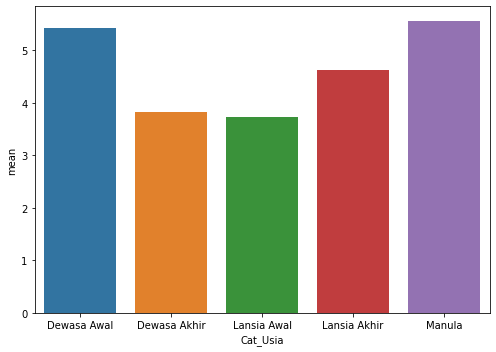

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Cat_Usia", order=['Dewasa Awal','Dewasa Akhir','Lansia Awal','Lansia Akhir','Manula'], y = 'mean',data=df1a)
plt.tight_layout();

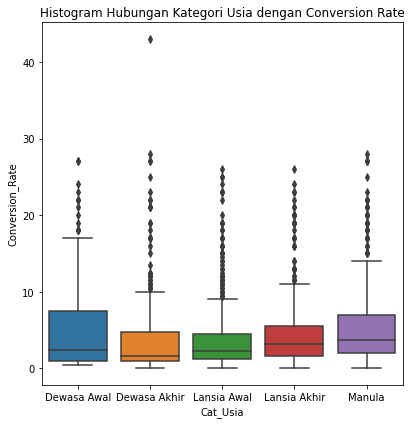

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Histogram Hubungan Kategori Usia dengan Conversion Rate', fontsize = 12);
sns.boxplot(x="Cat_Usia", order=['Dewasa Awal','Dewasa Akhir','Lansia Awal','Lansia Akhir','Manula'], y = 'Conversion_Rate',data=df)
plt.tight_layout();

### Kategori Usia vs Income

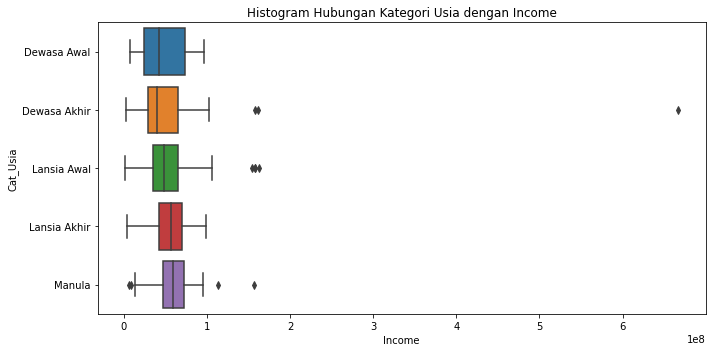

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Histogram Hubungan Kategori Usia dengan Income', fontsize = 12);
sns.boxplot(x="Income", order=['Dewasa Awal','Dewasa Akhir','Lansia Awal','Lansia Akhir','Manula'], y = 'Cat_Usia',data=df)
plt.tight_layout();

### Conversion Rate vs Income

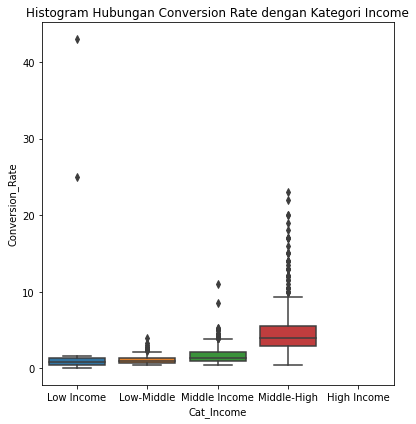

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Histogram Hubungan Conversion Rate dengan Kategori Income', fontsize = 12);
sns.boxplot(x="Cat_Income", order=['Low Income', 'Low-Middle','Middle Income','Middle-High','High Income'], y = 'Conversion_Rate',data=df)
plt.tight_layout();

### Conversion Rate vs Kategori Jumlah Transaksi

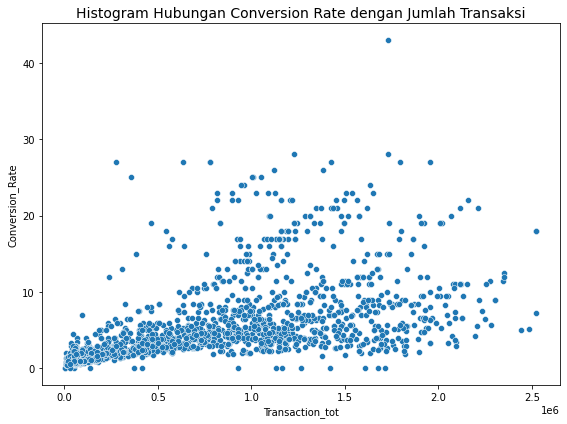

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Histogram Hubungan Conversion Rate dengan Jumlah Transaksi', fontsize = 14);
sns.scatterplot(x="Transaction_tot", y = 'Conversion_Rate',data=df)
plt.tight_layout();

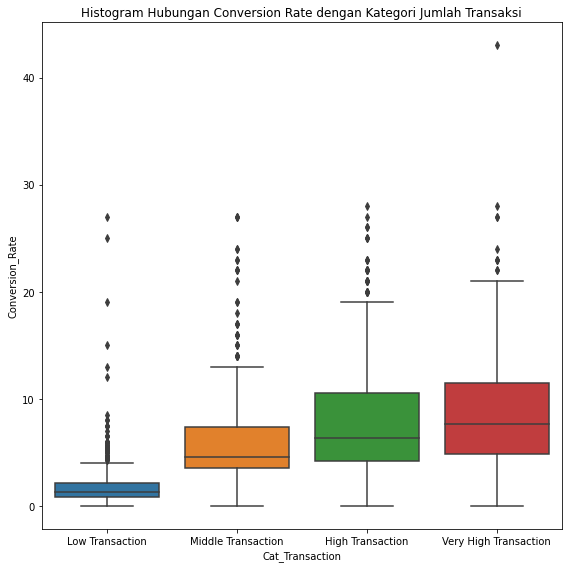

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Histogram Hubungan Conversion Rate dengan Kategori Jumlah Transaksi', fontsize = 12);
sns.boxplot(x="Cat_Transaction", order=['Low Transaction', 'Middle Transaction','High Transaction','Very High Transaction'], y = 'Conversion_Rate',data=df)
plt.tight_layout();

# Task 2 : Data Cleansing and Preprocessing


Hal yang dilakukan:
- Mengatasi Data Null dan Duplicated
- Membuang Data yang tidak diperlukan
- Melakukan Feature Encoding
- Melakukan Standarisasi pada Feature

## Data Null

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Num_Transaction         0
Conversion_Rate         2
Umur                    0
Cat_Usia                0
Jumlah_anak             0
is_parent               0
AcceptedCmp_Tot         0
Cat_Income              0
Transaction_

In [ ]:
df['Conversion_Rate'].fillna(df['Conversion_Rate'].mode()[0], inplace=True) 
df.Conversion_Rate.value_counts()
df.Conversion_Rate.isna().sum()

0

In [ ]:
df['Income'].fillna(df['Income'].mode()[0], inplace=True) 
df.Income.value_counts()
df.Income.isna().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Num_Transaction        0
Conversion_Rate        0
Umur                   0
Cat_Usia               0
Jumlah_anak            0
is_parent              0
AcceptedCmp_Tot        0
Cat_Income             0
Transaction_tot        0
Cat_Transaction        0


## Data Duplikat

In [ ]:
df.duplicated().sum()

0

## Feature Encoding


### Label : Education

In [ ]:
df.Education.value_counts()

S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

In [ ]:
education_map = {
                    'SMA':0, 
                    'D3':1,
                    'S1':2,
                    'S2':3,
                    'S3':4
                    }
df['education_map']= df['Education'].map(education_map)
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Conversion_Rate,Umur,Cat_Usia,Jumlah_anak,is_parent,AcceptedCmp_Tot,Cat_Income,Transaction_tot,Cat_Transaction,education_map
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,3.571429,65,Lansia Akhir,0,0,0,Middle-High,1617000,Very High Transaction,2
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,1.200000,68,Manula,2,1,0,Middle Income,27000,Low Transaction,2
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,5.250000,57,Lansia Akhir,0,0,0,High,776000,Middle Transaction,2
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,1.333333,38,Dewasa Akhir,1,1,0,Low-Middle,53000,Low Transaction,2
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,3.800000,41,Dewasa Akhir,1,1,0,Middle-High,422000,Low Transaction,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,3.600000,55,Lansia Awal,1,1,0,Middle-High,1341000,High Transaction,2
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,3.142857,76,Manula,3,1,1,Middle-High,444000,Low Transaction,4
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,3.166667,41,Dewasa Akhir,0,0,1,Middle-High,1241000,High Transaction,2
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,7.666667,66,Manula,1,1,0,Middle-High,843000,Middle Transaction,3


### OHE : Cat_Usia, Marital Status, Cat_Income, Cat_Transaction

In [ ]:
one_hot=df[['Cat_Usia','Marital_Status','Cat_Income','Cat_Transaction']]
one_hot=pd.get_dummies(one_hot)

In [ ]:
df = df.join(one_hot) #join one_hot ke df_encode


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             2240 non-null   int64  
 1   ID                                     2240 non-null   int64  
 2   Year_Birth                             2240 non-null   int64  
 3   Education                              2240 non-null   object 
 4   Marital_Status                         2240 non-null   object 
 5   Income                                 2240 non-null   float64
 6   Kidhome                                2240 non-null   int64  
 7   Teenhome                               2240 non-null   int64  
 8   Dt_Customer                            2240 non-null   object 
 9   Recency                                2240 non-null   int64  
 10  MntCoke                                2240 non-null   int64  
 11  MntF

## Fitur Transformation

In [ ]:
df2 = df.drop(columns = ['Unnamed: 0','ID','Education','Marital_Status','Kidhome','Teenhome',
              'Dt_Customer','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts',
              'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
              'NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
              'AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response','Cat_Usia',
              'Cat_Transaction','Cat_Income'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year_Birth                             2240 non-null   int64  
 1   Income                                 2240 non-null   float64
 2   Num_Transaction                        2240 non-null   int64  
 3   Conversion_Rate                        2240 non-null   float64
 4   Umur                                   2240 non-null   int64  
 5   Jumlah_anak                            2240 non-null   int64  
 6   is_parent                              2240 non-null   int64  
 7   AcceptedCmp_Tot                        2240 non-null   int64  
 8   Transaction_tot                        2240 non-null   int64  
 9   education_map                          2240 non-null   int64  
 10  Cat_Usia_Dewasa Akhir                  2240 non-null   uint8  
 11  Cat_

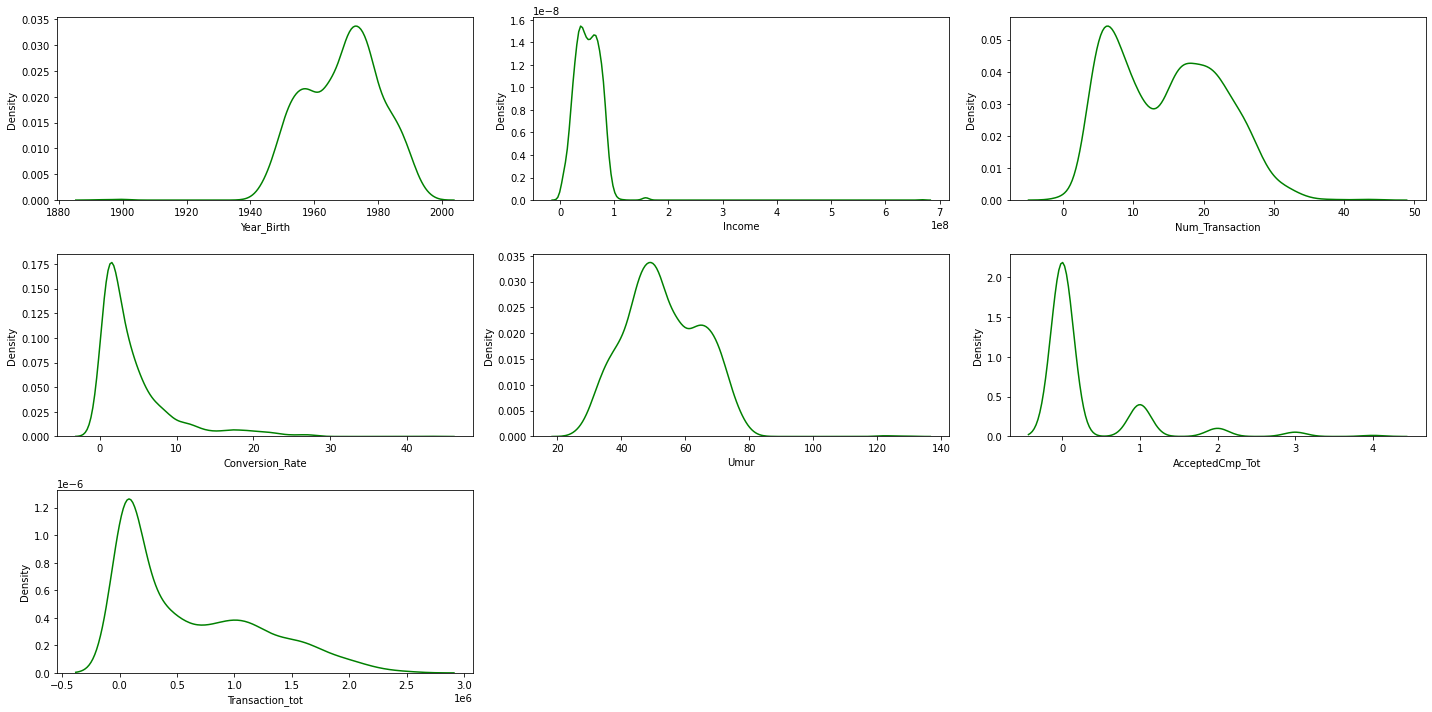

In [ ]:
#distribusi variabel pada kolom-kolom num_cols
features = ['Year_Birth','Income','Num_Transaction','Conversion_Rate','Umur','AcceptedCmp_Tot','Transaction_tot']
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
  plt.subplot(3 , 3 , i+1)
  sns.kdeplot(x = df2[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


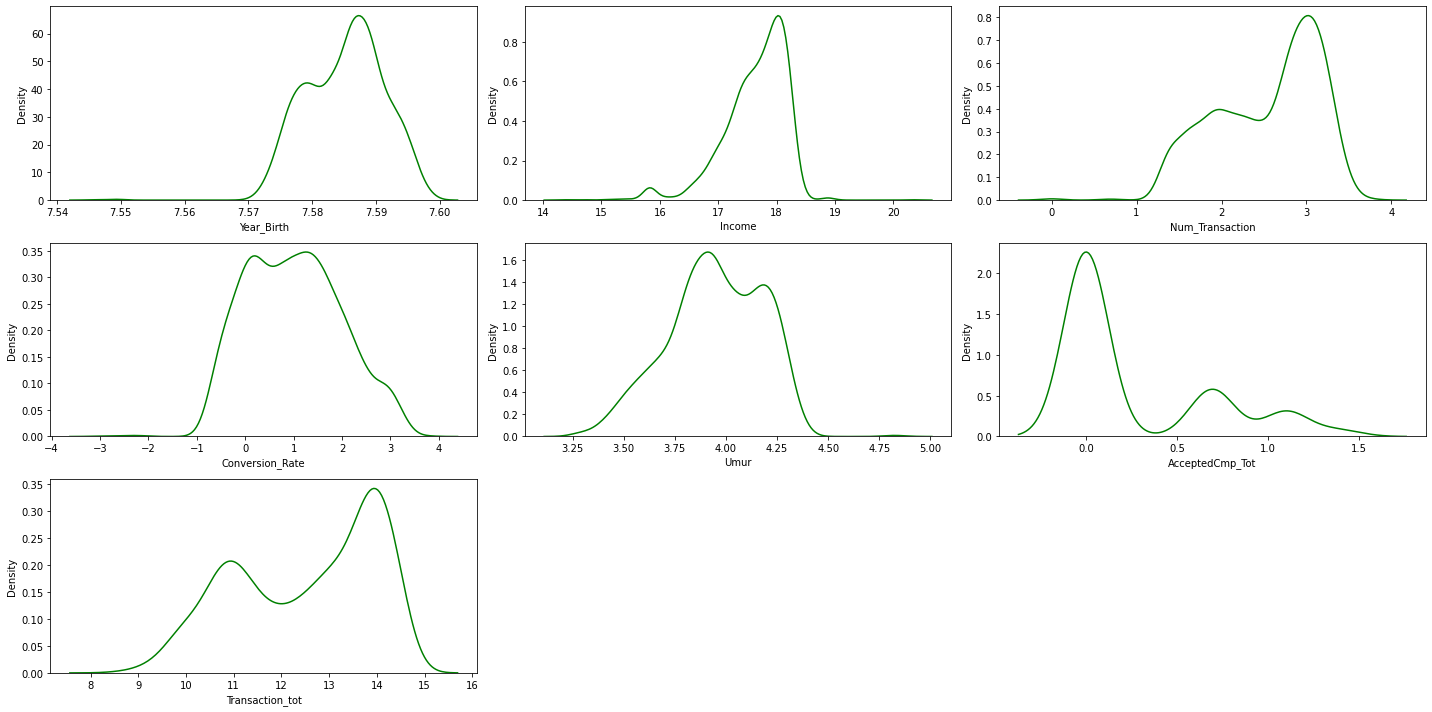

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
  plt.subplot(3 , 3 , i+1)
  sns.kdeplot(x = np.log(df2[features[i]]), color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

In [ ]:
#df2['log_Year_Birth'] = np.log(df2['Year_Birth'])
#df2['log_Income'] = np.log(df2['Income'])
#df2['log_Umur'] = np.log(df2['Umur'])
#df2['log_Transaction_tot'] = np.log(df2['Transaction_tot'])
# AcceptedCmp_Tot, Conversion_Rate, and Num_Transaction tidak dilog, karena hasilnya nya ada yang Infinite

In [ ]:
#df3 = df2.drop(columns = ['Year_Birth','Income','Umur','Transaction_tot'])


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year_Birth                             2240 non-null   int64  
 1   Income                                 2240 non-null   float64
 2   Num_Transaction                        2240 non-null   int64  
 3   Conversion_Rate                        2240 non-null   float64
 4   Umur                                   2240 non-null   int64  
 5   Jumlah_anak                            2240 non-null   int64  
 6   is_parent                              2240 non-null   int64  
 7   AcceptedCmp_Tot                        2240 non-null   int64  
 8   Transaction_tot                        2240 non-null   int64  
 9   education_map                          2240 non-null   int64  
 10  Cat_Usia_Dewasa Akhir                  2240 non-null   uint8  
 11  Cat_

In [ ]:
df2

,Year_Birth,Income,Num_Transaction,Conversion_Rate,Umur,Jumlah_anak,is_parent,AcceptedCmp_Tot,Transaction_tot,education_map,...,Marital_Status_Menikah,Cat_Income_High,Cat_Income_Low Income,Cat_Income_Low-Middle,Cat_Income_Middle Income,Cat_Income_Middle-High,Cat_Transaction_High Transaction,Cat_Transaction_Low Transaction,Cat_Transaction_Middle Transaction,Cat_Transaction_Very High Transaction
0,1957,58138000.0,25,3.571429,65,0,0,0,1617000,2,...,0,0,0,0,0,1,0,0,0,1
1,1954,46344000.0,6,1.200000,68,2,1,0,27000,2,...,0,0,0,0,1,0,0,1,0,0
2,1965,71613000.0,21,5.250000,57,0,0,0,776000,2,...,0,1,0,0,0,0,0,0,1,0
3,1984,26646000.0,8,1.333333,38,1,1,0,53000,2,...,0,0,0,1,0,0,0,1,0,0
4,1981,58293000.0,19,3.800000,41,1,1,0,422000,4,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223000.0,18,3.600000,55,1,1,0,1341000,2,...,1,0,0,0,0,1,1,0,0,0
2236,1946,64014000.0,22,3.142857,76,3,1,1,444000,4,...,0,0,0,0,0,1,0,1,0,0
2237,1981,56981000.0,19,3.166667,41,0,0,1,1241000,2,...,0,0,0,0,0,1,1,0,0,0
2238,1956,69245000.0,23,7.666667,66,1,1,0,843000,3,...,0,0,0,0,0,1,0,0,1,0


### Standarisasi = Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#sc_data = StandardScaler()
#df4 = sc_data.fit_transform(df3.astype(float))
#df4
sc_data = StandardScaler()
df3 = sc_data.fit_transform(df2.astype(float))
df3

array([[-0.98534473,  0.25027631,  1.32082612, ..., -1.11960758,
        -0.46056619,  2.84704954],
       [-1.23573295, -0.21309477, -1.15459595, ...,  0.89317009,
        -0.46056619, -0.35124082],
       [-0.3176428 ,  0.77969173,  0.79968463, ..., -1.11960758,
         2.17124059, -0.35124082],
       ...,
       [ 1.01776106,  0.20481927,  0.53911389, ..., -1.11960758,
        -0.46056619, -0.35124082],
       [-1.06880747,  0.68665606,  1.06025538, ..., -1.11960758,
         2.17124059, -0.35124082],
       [-1.23573295,  0.04326408, -0.50316909, ...,  0.89317009,
        -0.46056619, -0.35124082]])

# Task 3 : Data Modelling

Hal yang dilakukan:
- Melihat jumlah cluster yang tepat dengan menggunakan elbow-method
- Melakukan implementasi clustering dengan menggunakan k-means clustering
- Menghitung silhouette score melihat bagaimana performa model yang didapat

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(df3)
	kmeanModel.fit(df3)

	distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df3.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(df3, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / df3.shape[0]
	mapping2[k] = kmeanModel.inertia_

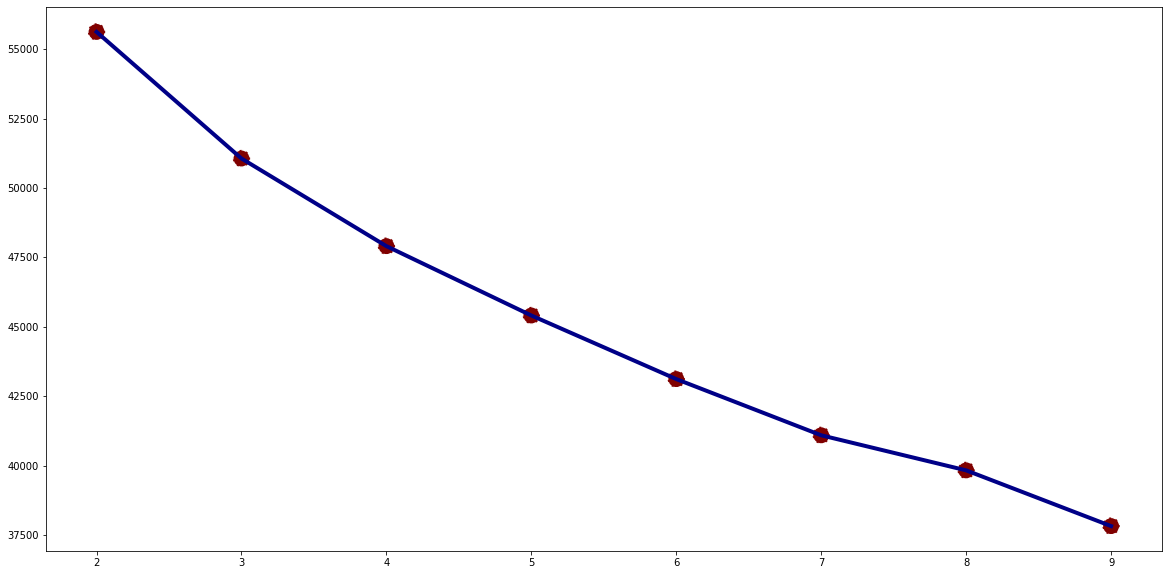

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 67199.99999999994
2 : 55622.08433928477
3 : 51061.855379255445
4 : 47942.10456954547
5 : 45626.25466028214
6 : 43025.92385971268
7 : 40797.31221762138
8 : 39383.658982664856
9 : 38557.072770797735


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df3)

In [ ]:
df4 = pd.DataFrame(data=df3, columns=list(df2))

In [ ]:
df4['clusters'] = kmeans.labels_

In [ ]:
df4

,Year_Birth,Income,Num_Transaction,Conversion_Rate,Umur,Jumlah_anak,is_parent,AcceptedCmp_Tot,Transaction_tot,education_map,...,Cat_Income_High,Cat_Income_Low Income,Cat_Income_Low-Middle,Cat_Income_Middle Income,Cat_Income_Middle-High,Cat_Transaction_High Transaction,Cat_Transaction_Low Transaction,Cat_Transaction_Middle Transaction,Cat_Transaction_Very High Transaction,clusters
0,-0.985345,0.250276,1.320826,-0.167898,0.985345,-1.264505,-1.584605,-0.439037,1.679417,-0.458383,...,-0.558100,-0.114526,-0.423755,-0.667204,1.567415,-0.434695,-1.119608,-0.460566,2.847050,2
1,-1.235733,-0.213095,-1.154596,-0.650699,1.235733,1.396361,0.631072,-0.439037,-0.961275,-0.458383,...,-0.558100,-0.114526,-0.423755,1.498792,-0.637993,-0.434695,0.893170,-0.460566,-0.351241,1
2,-0.317643,0.779692,0.799685,0.173843,0.317643,-1.264505,-1.584605,-0.439037,0.282673,-0.458383,...,1.791794,-0.114526,-0.423755,-0.667204,-0.637993,-0.434695,-1.119608,2.171241,-0.351241,2
3,1.268149,-0.987004,-0.894025,-0.623553,-1.268149,0.065928,0.631072,-0.439037,-0.918094,-0.458383,...,-0.558100,-0.114526,2.359855,-0.667204,-0.637993,-0.434695,0.893170,-0.460566,-0.351241,1
4,1.017761,0.256366,0.539114,-0.121363,-1.017761,0.065928,0.631072,-0.439037,-0.305254,1.533425,...,-0.558100,-0.114526,-0.423755,-0.667204,1.567415,-0.434695,0.893170,-0.460566,-0.351241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,0.371482,0.408829,-0.162082,0.150717,0.065928,0.631072,-0.439037,1.221032,-0.458383,...,-0.558100,-0.114526,-0.423755,-0.667204,1.567415,2.300464,-1.119608,-0.460566,-0.351241,0
2236,-1.903435,0.481137,0.929970,-0.255152,1.903435,2.726794,0.631072,1.035390,-0.268717,1.533425,...,-0.558100,-0.114526,-0.423755,-0.667204,1.567415,-0.434695,0.893170,-0.460566,-0.351241,0
2237,1.017761,0.204819,0.539114,-0.250304,-1.017761,-1.264505,-1.584605,1.035390,1.054951,-0.458383,...,-0.558100,-0.114526,-0.423755,-0.667204,1.567415,2.300464,-1.119608,-0.460566,-0.351241,2
2238,-1.068807,0.686656,1.060255,0.665853,1.068807,0.065928,0.631072,-0.439037,0.393948,0.537521,...,-0.558100,-0.114526,-0.423755,-0.667204,1.567415,-0.434695,-1.119608,2.171241,-0.351241,0


# Task 4 : Customer Personality Analysis for Marketing Retargeting

Hal yang dilakukan:
- Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan
- Memilih cluster yang akan dilakukan marketing retargeting
- Menghitung potential impact dari hasil marketing retargeting dari cluster yang ada.

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df4)
pcs = pca.transform(df4)


In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = df4['clusters']
data_pca.head(10)

,PC 1,PC 2,clusters
0,3.089506,0.367656,2
1,-2.043303,2.010735,1
2,2.626746,0.104496,2
3,-2.740333,-2.126784,1
4,-0.908067,-0.485896,0
5,0.616739,1.619488,0
6,0.298263,1.268016,0
7,-2.437923,-1.528531,1
8,-2.510989,-0.020610,1
9,-2.192548,2.227708,1


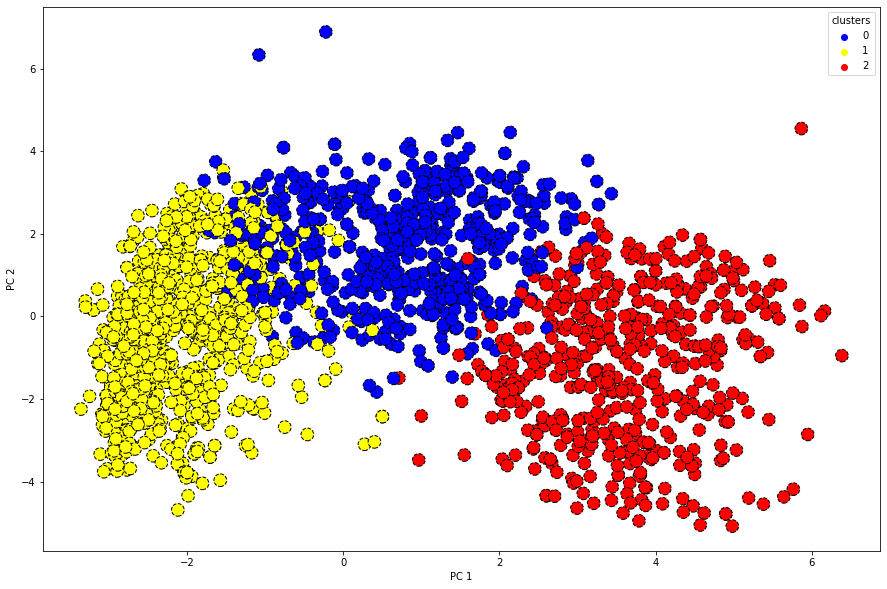

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','yellow','red'],
    s=160,
    ax=ax
)

In [ ]:
df2['clusters'] = kmeans.labels_
display(df2.groupby('clusters')['Year_Birth','Income','Num_Transaction','Umur','Jumlah_anak','is_parent','AcceptedCmp_Tot','Transaction_tot'].agg(['mean','median']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Year_Birth                Income             Num_Transaction  \
                 mean  median          mean      median            mean   
clusters                                                                  
0         1963.372392  1964.0  5.949148e+07  60000000.0       20.346709   
1         1971.908004  1973.0  3.404444e+07  34633000.0        8.771849   
2         1968.830189  1970.0  7.903851e+07  77866500.0       20.905660   

                      Umur        Jumlah_anak        is_parent         \
         median       mean median        mean median      mean median   
clusters                                                                
0          21.0  58.627608   58.0    1.094703    1.0  0.871589    1.0   
1           8.0  50.091996   49.0    1.221711    1.0  0.877645    1.0   
2          21.0  53.169811   52.0    0.224528    0.0  0.198113    0.0   

         AcceptedCmp_Tot        Transaction_tot             
                    mean median            mean     median  
clusters                                                    
0               0.218299    0.0    7.350433e+05   730000.0  
1               0.090156    0.0    1.250589e+05    68000.0  
2               0.816981    0.0    1.439843e+06  1435000.0